In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import warnings
import codecs
from textblob import TextBlob
import nltk
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import re
from decimal import Decimal, ROUND_HALF_EVEN
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\Peter\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
url = 'https://raw.githubusercontent.com/PLombardo811/620/Final/commnets_df_ABC.CSV'
df_abc = pd.read_csv(url, sep='\t', engine='python')
df_abc['source'] = 'ABC'

In [3]:
url = 'https://raw.githubusercontent.com/PLombardo811/620/Final/commnets_df_ABC.CSV'
df_cbs = pd.read_csv(url, sep='\t', engine='python')
df_cbs['source'] = 'CBS'

In [4]:
url = 'https://raw.githubusercontent.com/PLombardo811/620/Final/commnets_df_CNN.csv'
df_cnn = pd.read_csv(url, sep='\t', engine='python')
df_cnn['source'] = 'CNN'

In [5]:
url = 'https://raw.githubusercontent.com/PLombardo811/620/Final/commnets_df_FOX.CSV'
df_fox = pd.read_csv(url, sep='\t', engine='python')
df_fox['source'] = 'FOX'

In [6]:
frames = [df_cnn, df_cbs, df_abc, df_fox]

In [7]:
df_final = pd.concat(frames)

In [8]:
def sentiment_calc(df_final):
    try:
        return TextBlob(df_final).sentiment
    except:
        return None

In [9]:
df_final['sentiment'] = df_final['comments'].apply(sentiment_calc)

df_final['sentiment_String'] = df_final['sentiment'].astype(str)

df_final['sentiment_int'] = df_final.sentiment_String.str.extract('([-+]?\d*\.\d+|\d+)')

df_final['sentiment_int'] = df_final['sentiment_int'].astype(float)

In [10]:
df_final

,comments,source,sentiment,sentiment_String,sentiment_int
0,I totally agree with you Anderson this Preside...,CNN,"(-0.125, 0.625)","Sentiment(polarity=-0.125, subjectivity=0.625)",-0.125000
1,Russian mafia at its best!! Congrats Republic...,CNN,"(0.5, 0.15)","Sentiment(polarity=0.5, subjectivity=0.15)",0.500000
2,Donald Trump looked at the cameras and specifi...,CNN,"(0.08125, 0.23125)","Sentiment(polarity=0.08125, subjectivity=0.23125)",0.081250
3,If any true American Patriots exist in the Rep...,CNN,"(0.175, 0.325)","Sentiment(polarity=0.175, subjectivity=0.325)",0.175000
4,"Thank you Anderson, you’re absolutely correct!...",CNN,"(-0.275, 0.95)","Sentiment(polarity=-0.275, subjectivity=0.95)",-0.275000
5,When the President of the United States doesn'...,CNN,"(-0.5, 0.9)","Sentiment(polarity=-0.5, subjectivity=0.9)",-0.500000
6,"Treason .\nWhoever, owing allegiance to the Un...",CNN,"(-0.11111111111111112, 0.37777777777777777)","Sentiment(polarity=-0.11111111111111112, subje...",-0.111111
7,Trump orders the American citizens to denounce...,CNN,"(0.25, 0.45)","Sentiment(polarity=0.25, subjectivity=0.45)",0.250000
8,"Sad that our President chose to insult 850,000...",CNN,"(0.0, 0.7)","Sentiment(polarity=0.0, subjectivity=0.7)",0.000000
9,Hey tRumpsters what happened to make America G...,CNN,"(0.8, 0.75)","Sentiment(polarity=0.8, subjectivity=0.75)",0.800000


In [11]:
sentiment_int = df_final["sentiment_int"].tolist()

In [12]:
def get_comment_sentiment():
 sentiment = []
 for i in sentiment_int:
    if i > 0:
        sentiment.append('positive')
    elif i == 0:
        sentiment.append('neutral')
    else:
        sentiment.append('negative')
 return(sentiment)

comment_sentiment = get_comment_sentiment()

In [13]:
df_final['sentiment'] = comment_sentiment

In [14]:
df_final['index_col'] = df_final.index

In [15]:
df_final

,comments,source,sentiment,sentiment_String,sentiment_int,index_col
0,I totally agree with you Anderson this Preside...,CNN,negative,"Sentiment(polarity=-0.125, subjectivity=0.625)",-0.125000,0
1,Russian mafia at its best!! Congrats Republic...,CNN,positive,"Sentiment(polarity=0.5, subjectivity=0.15)",0.500000,1
2,Donald Trump looked at the cameras and specifi...,CNN,positive,"Sentiment(polarity=0.08125, subjectivity=0.23125)",0.081250,2
3,If any true American Patriots exist in the Rep...,CNN,positive,"Sentiment(polarity=0.175, subjectivity=0.325)",0.175000,3
4,"Thank you Anderson, you’re absolutely correct!...",CNN,negative,"Sentiment(polarity=-0.275, subjectivity=0.95)",-0.275000,4
5,When the President of the United States doesn'...,CNN,negative,"Sentiment(polarity=-0.5, subjectivity=0.9)",-0.500000,5
6,"Treason .\nWhoever, owing allegiance to the Un...",CNN,negative,"Sentiment(polarity=-0.11111111111111112, subje...",-0.111111,6
7,Trump orders the American citizens to denounce...,CNN,positive,"Sentiment(polarity=0.25, subjectivity=0.45)",0.250000,7
8,"Sad that our President chose to insult 850,000...",CNN,neutral,"Sentiment(polarity=0.0, subjectivity=0.7)",0.000000,8
9,Hey tRumpsters what happened to make America G...,CNN,positive,"Sentiment(polarity=0.8, subjectivity=0.75)",0.800000,9


In [16]:
node_categories = {
    "sentiment":df_final["sentiment"].tolist(),
    "source": df_final["source"].tolist(),
    "index_col": df_final["index_col"].tolist()
}

In [41]:
for i in range(1):
    df_final["edges_1"] = df_final.apply(lambda x: (x["sentiment"], x["index_col"]), axis=1)
    df_final["edges_2"] = df_final.apply(lambda x: (x["sentiment"], x["source"]), axis=1)
    df_final["edges_3"] = df_final.apply(lambda x: (x["index_col"], x["source"]), axis=1)

In [42]:
df_final

,comments,source,sentiment,sentiment_String,sentiment_int,index_col,edges_1,edges_2,edges_3
0,I totally agree with you Anderson this Preside...,CNN,negative,"Sentiment(polarity=-0.125, subjectivity=0.625)",-0.125000,0,"(negative, 0)","(negative, CNN)","(0, CNN)"
1,Russian mafia at its best!! Congrats Republic...,CNN,positive,"Sentiment(polarity=0.5, subjectivity=0.15)",0.500000,1,"(positive, 1)","(positive, CNN)","(1, CNN)"
2,Donald Trump looked at the cameras and specifi...,CNN,positive,"Sentiment(polarity=0.08125, subjectivity=0.23125)",0.081250,2,"(positive, 2)","(positive, CNN)","(2, CNN)"
3,If any true American Patriots exist in the Rep...,CNN,positive,"Sentiment(polarity=0.175, subjectivity=0.325)",0.175000,3,"(positive, 3)","(positive, CNN)","(3, CNN)"
4,"Thank you Anderson, you’re absolutely correct!...",CNN,negative,"Sentiment(polarity=-0.275, subjectivity=0.95)",-0.275000,4,"(negative, 4)","(negative, CNN)","(4, CNN)"
5,When the President of the United States doesn'...,CNN,negative,"Sentiment(polarity=-0.5, subjectivity=0.9)",-0.500000,5,"(negative, 5)","(negative, CNN)","(5, CNN)"
6,"Treason .\nWhoever, owing allegiance to the Un...",CNN,negative,"Sentiment(polarity=-0.11111111111111112, subje...",-0.111111,6,"(negative, 6)","(negative, CNN)","(6, CNN)"
7,Trump orders the American citizens to denounce...,CNN,positive,"Sentiment(polarity=0.25, subjectivity=0.45)",0.250000,7,"(positive, 7)","(positive, CNN)","(7, CNN)"
8,"Sad that our President chose to insult 850,000...",CNN,neutral,"Sentiment(polarity=0.0, subjectivity=0.7)",0.000000,8,"(neutral, 8)","(neutral, CNN)","(8, CNN)"
9,Hey tRumpsters what happened to make America G...,CNN,positive,"Sentiment(polarity=0.8, subjectivity=0.75)",0.800000,9,"(positive, 9)","(positive, CNN)","(9, CNN)"


In [74]:
G = nx.Graph()
G.add_edges_from(df_final["edges_1"].tolist()+df_final["edges_3"].tolist())
G.add_nodes_from(df_final["index_col"].tolist()+df_final["sentiment"].tolist() + df_final["source"].tolist())
for node in G:
    if node in df_final["sentiment"]:
        G.node[node]["category"] = "sentiment"
    elif node in df_final["source"]:
        G.node[node]["category"] = "source"
    else:
        G.node[node]["category"] = "index_col"

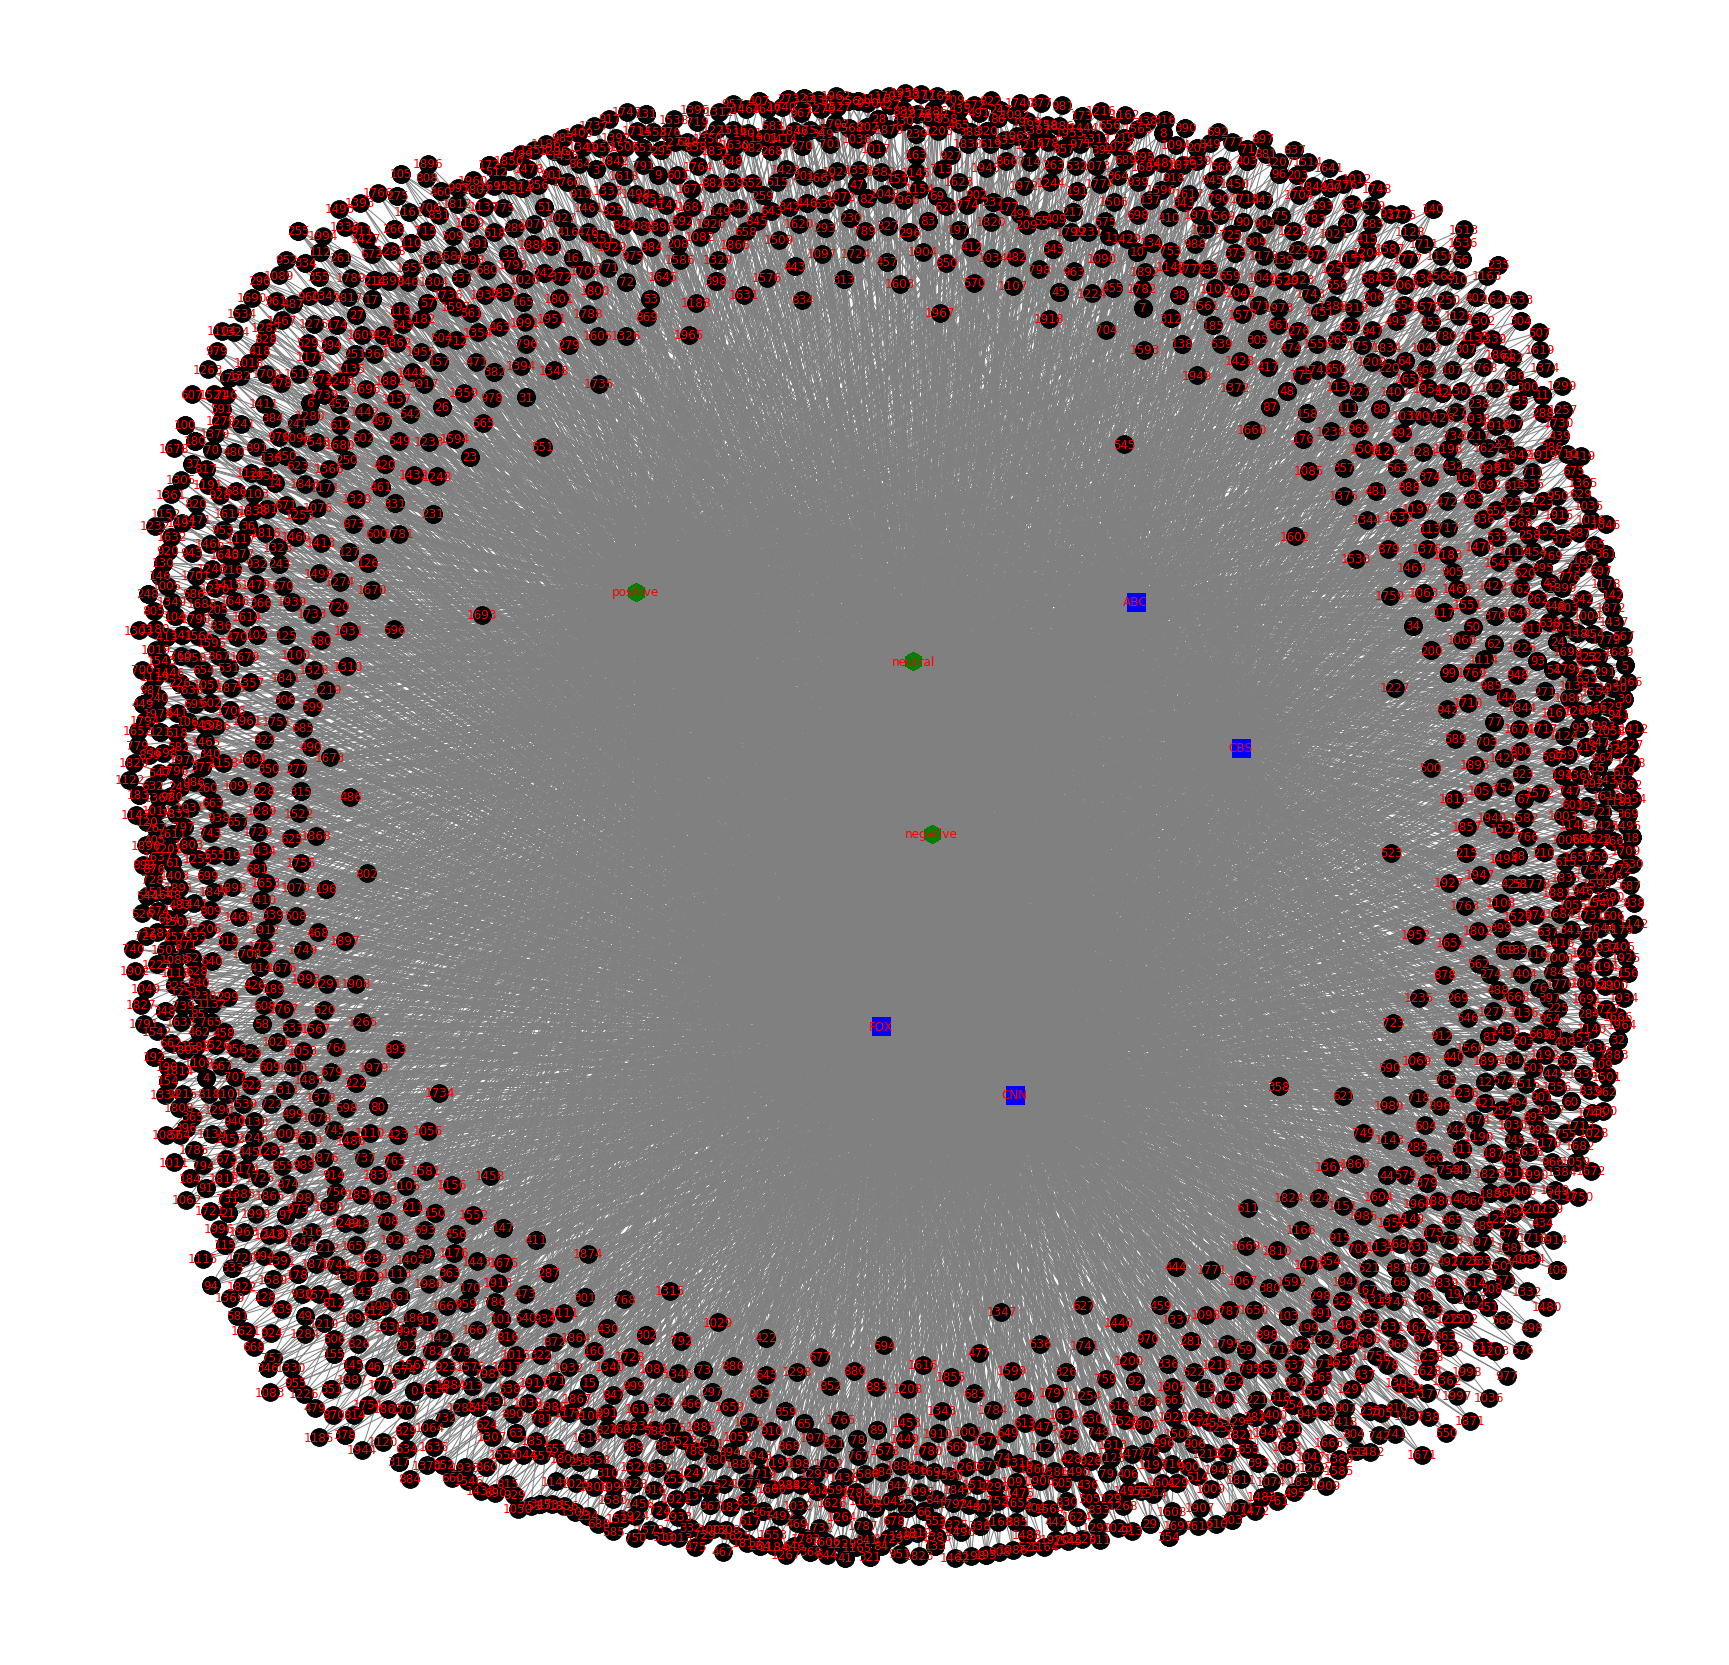

In [77]:
pos = nx.spring_layout(G,k=1.5,iterations=20)
pos_labels = {}
keys = pos.keys()
for key in keys:
    x, y = pos[key]
    pos_labels[key] = (x, y)
plt.figure(figsize=(30,30))
nx.draw_networkx_labels(G, pos_labels, font_color='red')
nx.draw_networkx_edges(G, pos, edge_color="Gray")
nx.draw_networkx_nodes(G, pos, nodelist=node_categories["sentiment"], node_color= 'green', node_shape="h", node_size=300)
nx.draw_networkx_nodes(G, pos, nodelist=node_categories["index_col"], node_color="black", node_shape="o", node_size=300)
nx.draw_networkx_nodes(G, pos, nodelist=node_categories["source"], node_color="blue", node_shape="s", node_size=300)
plt.axis('off')
plt.show()